In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\iamal\OneDrive\Desktop\hypothyroid.csv")

In [4]:
df.shape

(3772, 30)

In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [6]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [7]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [8]:
df["sex"].value_counts()

F    2480
M    1142
?     150
Name: sex, dtype: int64

# P = Positive 
## N = Negative

In [9]:
df["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [10]:
df.rename(columns={"binaryClass":"Label"}, inplace=True)

In [11]:
df.replace('?',np.nan,inplace=True)

In [12]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Label
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,P


In [13]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Label'],
      dtype='object')

In [14]:
df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

Content
This dataset has 16 categorical attributes, 5 numerical attributes, and 1 target attribute, then 22 attributes in total.

1) here is the variable description for the categorical attributes:
age: continuous.
sex: categorical, M, F.
on thyroxine: categorical, f, t.
query on thyroxine: categorical, f, t.
on antithyroid medication: categorical, f, t.
sick: categorical, f, t.
pregnant: categorical, f, t.
thyroid surgery: categorical, f, t.
I131 treatment: categorical, f, t.
query hypothyroid: categorical, f, t.
query hyperthyroid: categorical, f, t.
lithium: categorical, f, t.
goitre: categorical, f, t.
tumor: categorical, f, t.
hypopituitary: categorical, f, t.
psych: categorical, f, t.
For the sake of convenience, age is normalised into (0,1), all the categorical variables are mapped in the following ways: {"M" -> 0 , "F" -> 1}, or {"f" ->0, "t" -> 1}.

2). here is the variable description for the numerical attributes:
TSH: continuous.
T3: continuous.
TT4: continuous.
T4U: continuous.
FTI: continuous.

3). here is the variable description for the target attributes:

<AxesSubplot:xlabel='sex', ylabel='count'>

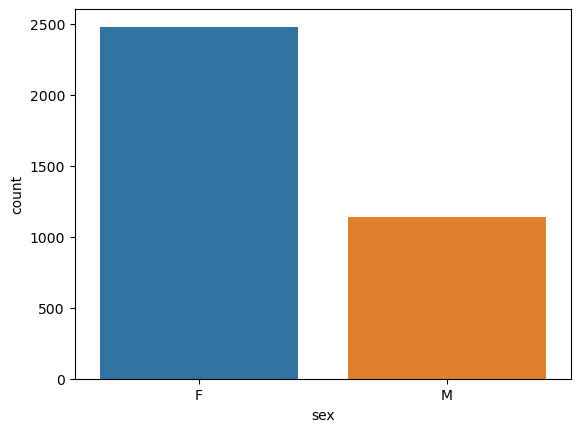

In [15]:
sns.countplot(x="sex", data=df)

In [16]:
df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,4.1,2,102,NaN,NaN,P
2,46,M,f,f,f,f,f,f,f,0.98,NaN,109,0.91,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9,175,NaN,NaN,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P


In [17]:
col = ['age','FTI','TSH','T3','TT4','T4U']
for i in col:
    df[i] = pd.to_numeric(df[i])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


# missing values

In [19]:
df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [20]:
#here missing values
## TSH              369
#T3                 769
#TT4                231
#T4U                387
#FTI

miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    
    df[i] = df[i].fillna(df[i].mean())


In [21]:
df.dropna(inplace=True)


In [22]:
df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [23]:
df = df.drop(1364)

In [24]:
df.TT4 = df.TT4.astype(int)
df.FTI = df.FTI.astype(int)
df.age = df.age.astype(int)

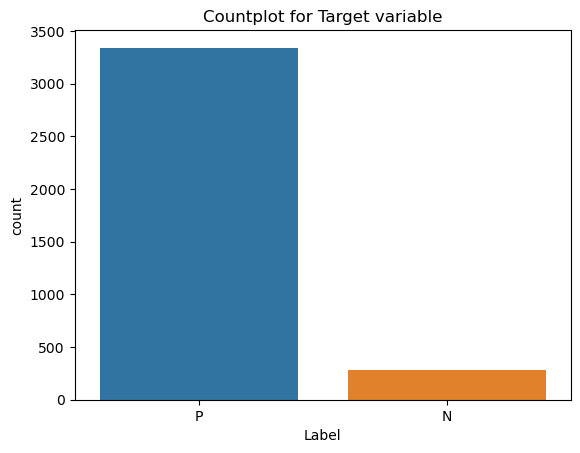

In [25]:
sns.countplot(x='Label',data=df)
plt.title("Countplot for Target variable");

In [26]:
positive_df = df[df.Label=='P']

In [27]:
positive_df.head(10)

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.300000,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.100000,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.980000,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.160000,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.720000,1.2000,61,0.870,70,P
5,18,F,f,f,f,f,f,f,f,0.030000,2.0135,183,1.300,141,P
6,59,F,f,f,f,f,f,f,f,5.086766,2.0135,72,0.920,78,P
7,80,F,f,f,f,f,f,f,f,2.200000,0.6000,80,0.700,115,P
8,66,F,f,f,f,f,f,f,t,0.600000,2.2000,123,0.930,132,P
9,68,M,f,f,f,f,f,f,f,2.400000,1.6000,83,0.890,93,P


In [2]:
import seaborn as sns

# Set the figure size of the plot
sns.set(rc={"figure.figsize": (10, 8)})

# Create a heatmap of the correlation matrix of the dataframe with annotations
sns.heatmap(df.corr(), annot=True)


NameError: name 'df' is not defined

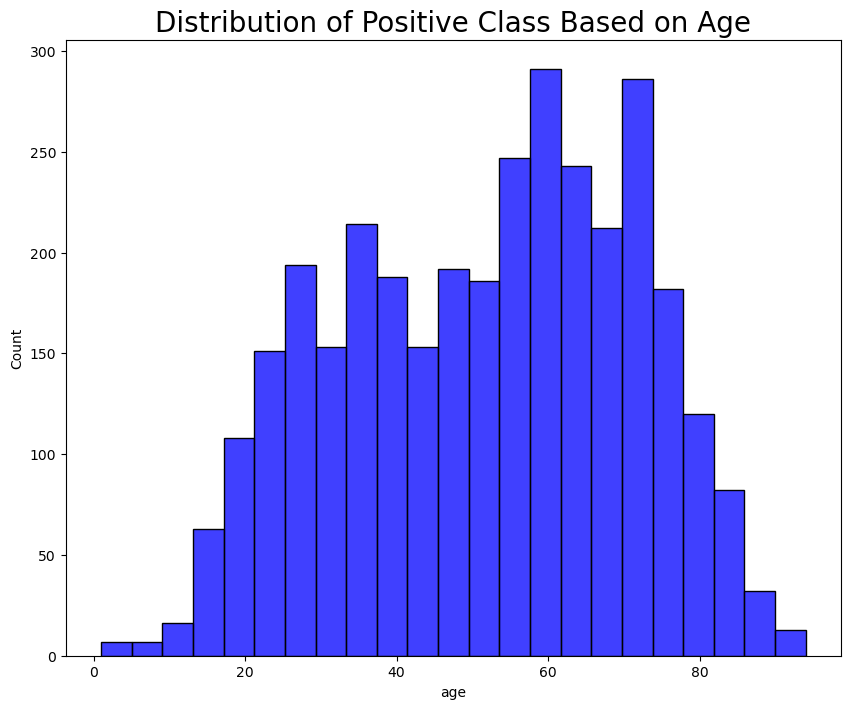

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(x='age',data=positive_df,color='blue')
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});


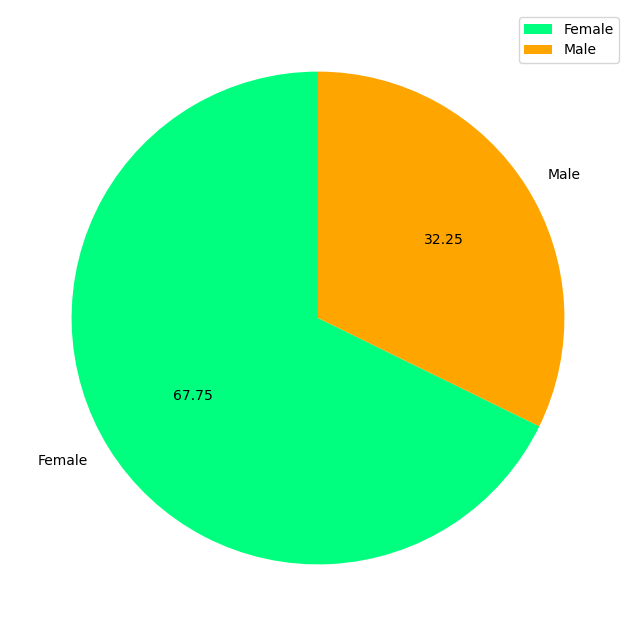

In [29]:
plt.figure(figsize=(10,8))
plt.pie(x=positive_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();

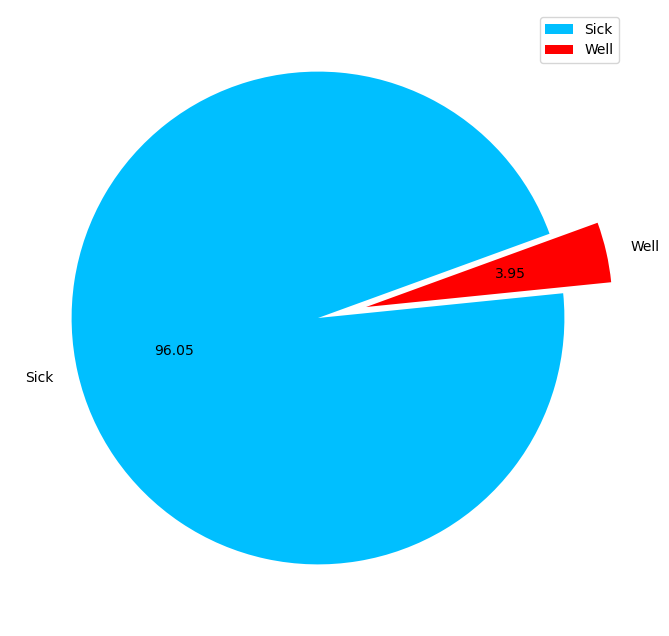

In [30]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

In [31]:
X = df.drop('Label',axis=1)
y = df.Label

In [32]:
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
th_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
lith_encoder = LabelEncoder()
g_encoder= LabelEncoder()
tu_encoder = LabelEncoder()

In [33]:
X['sex'] = s_encoder.fit_transform(X.sex)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = th_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = lith_encoder.fit_transform(X['lithium'])
X['goitre'] = g_encoder.fit_transform(X['goitre'])
X['tumor'] = tu_encoder.fit_transform(X['tumor'])

In [34]:
def func(df):
    if df == 'P':
        return 1
    else:
        return 0

In [35]:
y = y.apply(func)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [37]:
smote = SMOTE(random_state=11)


In [38]:
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [39]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)

Shape before the Oversampling :  (2896, 14)
Shape after the Oversampling :  (5340, 14)


In [40]:
scalr = MinMaxScaler()
x_smote.TT4 = scalr.fit_transform(x_smote[['TT4']])
x_smote.age = scalr.fit_transform(x_smote[['age']])
x_smote.FTI = scalr.fit_transform(x_smote[['FTI']])

In [41]:
X_test.TT4 = scalr.transform(X_test[['TT4']])
X_test.age = scalr.transform(X_test[['age']])
X_test.FTI = scalr.transform(X_test[['FTI']])

# Build Models

In [63]:
models = {
    LogisticRegression(max_iter=500): 'Logistic Regression',
    SVC(): "Support Vector Machine",
    RandomForestClassifier(): 'Random Forest'
}

# Training models
for model in models.keys():
    model.fit(x_smote, y_smote)

# Printing accuracy scores
for model, name in models.items():
    accuracy = model.score(X_test, y_test) * 100
    print(f"Accuracy Score for {name}: {accuracy}%")

Accuracy Score for Logistic Regression: 98.20441988950276%
Accuracy Score for Support Vector Machine: 98.20441988950276%
Accuracy Score for Random Forest: 98.89502762430939%


In [64]:
for model, name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")
    print("----------------------------------------------------------")
    print(classification_report(y_test, y_pred, digits=4))
    print("----------------------------------------------------------")
    print(confusion_matrix(y_test, y_pred))
    print("----------------------------------------------------------")


Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8596    0.9074    0.8829        54
           1     0.9925    0.9881    0.9903       670

    accuracy                         0.9820       724
   macro avg     0.9261    0.9477    0.9366       724
weighted avg     0.9826    0.9820    0.9823       724

----------------------------------------------------------
[[ 49   5]
 [  8 662]]
----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8154    0.9815    0.8908        54
           1     0.9985    0.9821    0.9902       670

    accuracy                         0.9820       724
   macro avg     0.9069    0.9818    0.9405       724
weighted avg     0.9848    0.9820    0.9828    

In [65]:
rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)
rf.score(X_test,y_test)

0.9903314917127072

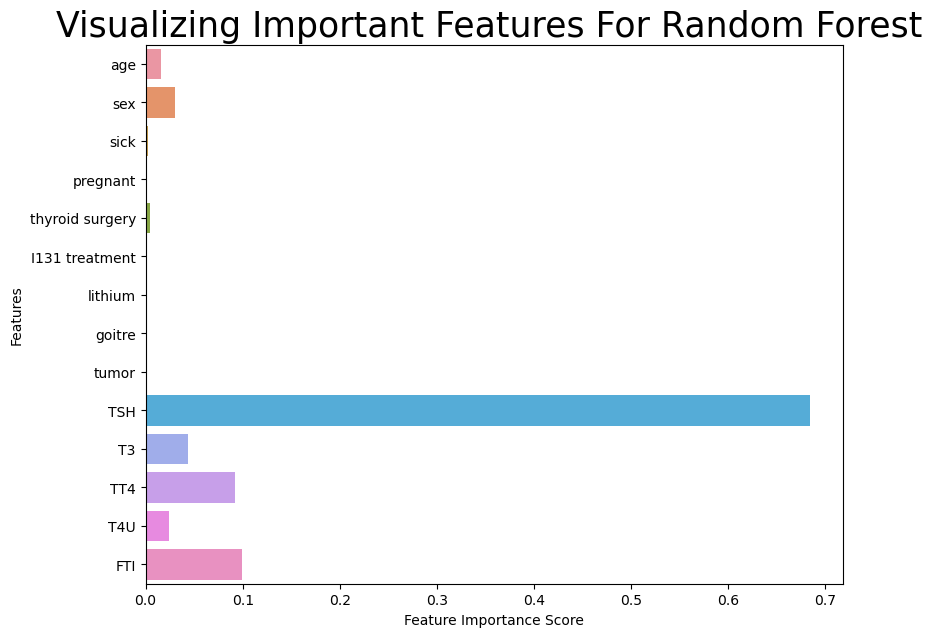

In [45]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Random Forest ",{'fontsize':25})
plt.show();


In [46]:
x_smote.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)
X_test.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)

In [47]:
new_rf = RandomForestClassifier()
new_rf.fit(x_smote,y_smote)
new_rf.score(X_test,y_test)

0.988950276243094

In [48]:
df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.30,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.10,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.98,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2000,61,0.870,70,P


In [49]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();




In [50]:
from sklearn.metrics import roc_curve


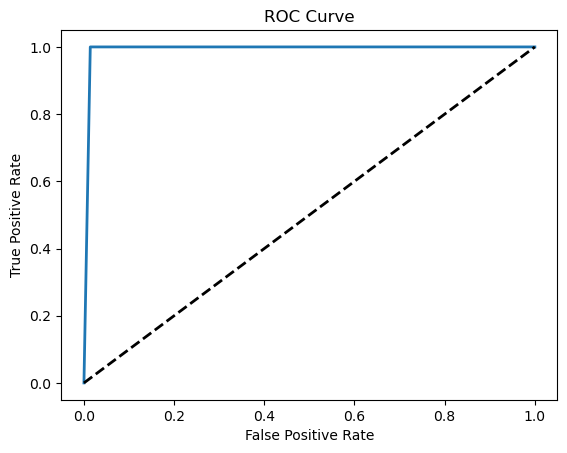

In [51]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(x_smote, y_smote)
y_pred = rand_clf.predict(x_smote)
fpr, tpr, t = roc_curve(y_pred, y_smote)
plot_roc()

# K Neighbour Classifer

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_smote, y_smote)

KNeighborsClassifier()

In [53]:
# model predictions 

y_pred = knn.predict(x_smote)

In [54]:
# accuracy score

print(accuracy_score(y_smote, knn.predict(x_smote)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9861423220973783
0.9834254143646409


In [55]:
# confusion matrix

print(confusion_matrix(y_smote, y_pred))

[[2665    5]
 [  69 2601]]


In [56]:
# classification report

print(classification_report(y_pred, y_smote,digits=4))

              precision    recall  f1-score   support

           0     0.9981    0.9748    0.9863      2734
           1     0.9742    0.9981    0.9860      2606

    accuracy                         0.9861      5340
   macro avg     0.9861    0.9864    0.9861      5340
weighted avg     0.9864    0.9861    0.9861      5340



# Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(x_smote, y_smote)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [58]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [59]:
# best score

grid_search_dt.best_score_


0.9904494382022472

In [60]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(x_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [61]:
y_pred = dtc.predict(x_smote)

In [62]:
# accuracy score
print(accuracy_score(y_smote, dtc.predict(x_smote)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9945692883895131
0.9792817679558011
